In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
os.chdir("D:\Stroke-Prediction")

In [3]:
os.listdir()

['healthcare-dataset-stroke-data.csv', 'Stroke-cleaned-preprocessed-data.csv']

In [4]:
dataset = pd.read_csv("Stroke-cleaned-preprocessed-data.csv")

In [5]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,24905,0,65,0,0,1,0,0,205.77,46.0,1,1
1,24669,0,77,0,1,1,0,1,231.56,36.9,2,1
2,60739,0,79,1,1,0,1,1,60.94,28.9,2,1
3,71279,0,71,0,0,1,2,0,263.32,38.7,2,1
4,10434,0,69,0,0,0,0,0,94.39,22.8,2,1


In [6]:
x = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]

In [9]:
bestfeature = SelectKBest(score_func=chi2,k=10)

In [10]:
fit =bestfeature.fit(x,y)

In [12]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [15]:
featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns = ['Feature','Score']

In [16]:
featurescores

,Feature,Score
0,gender,1.447863
1,age,29325.563199
2,hypertension,411.115294
3,heart_disease,395.456889
4,ever_married,180.338004
5,work_type,336.793185
6,Residence_type,7.012987
7,avg_glucose_level,14050.841179
8,bmi,147.546463
9,smoking_status,101.810143


In [18]:
print(featurescores.nlargest(8,'Score'))

             Feature         Score
1                age  29325.563199
7  avg_glucose_level  14050.841179
2       hypertension    411.115294
3      heart_disease    395.456889
5          work_type    336.793185
4       ever_married    180.338004
8                bmi    147.546463
9     smoking_status    101.810143


In [19]:
model = ExtraTreesClassifier()

In [20]:
model.fit(x,y)

ExtraTreesClassifier()

In [21]:
print(model.feature_importances_)

[0.03847528 0.35754305 0.03937177 0.02745619 0.04822127 0.06632721
 0.03962232 0.16404484 0.13529238 0.08364569]


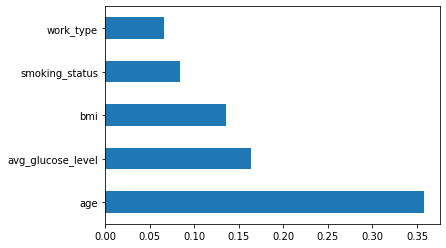

In [23]:
feat_imp = pd.Series(model.feature_importances_ , index=x.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

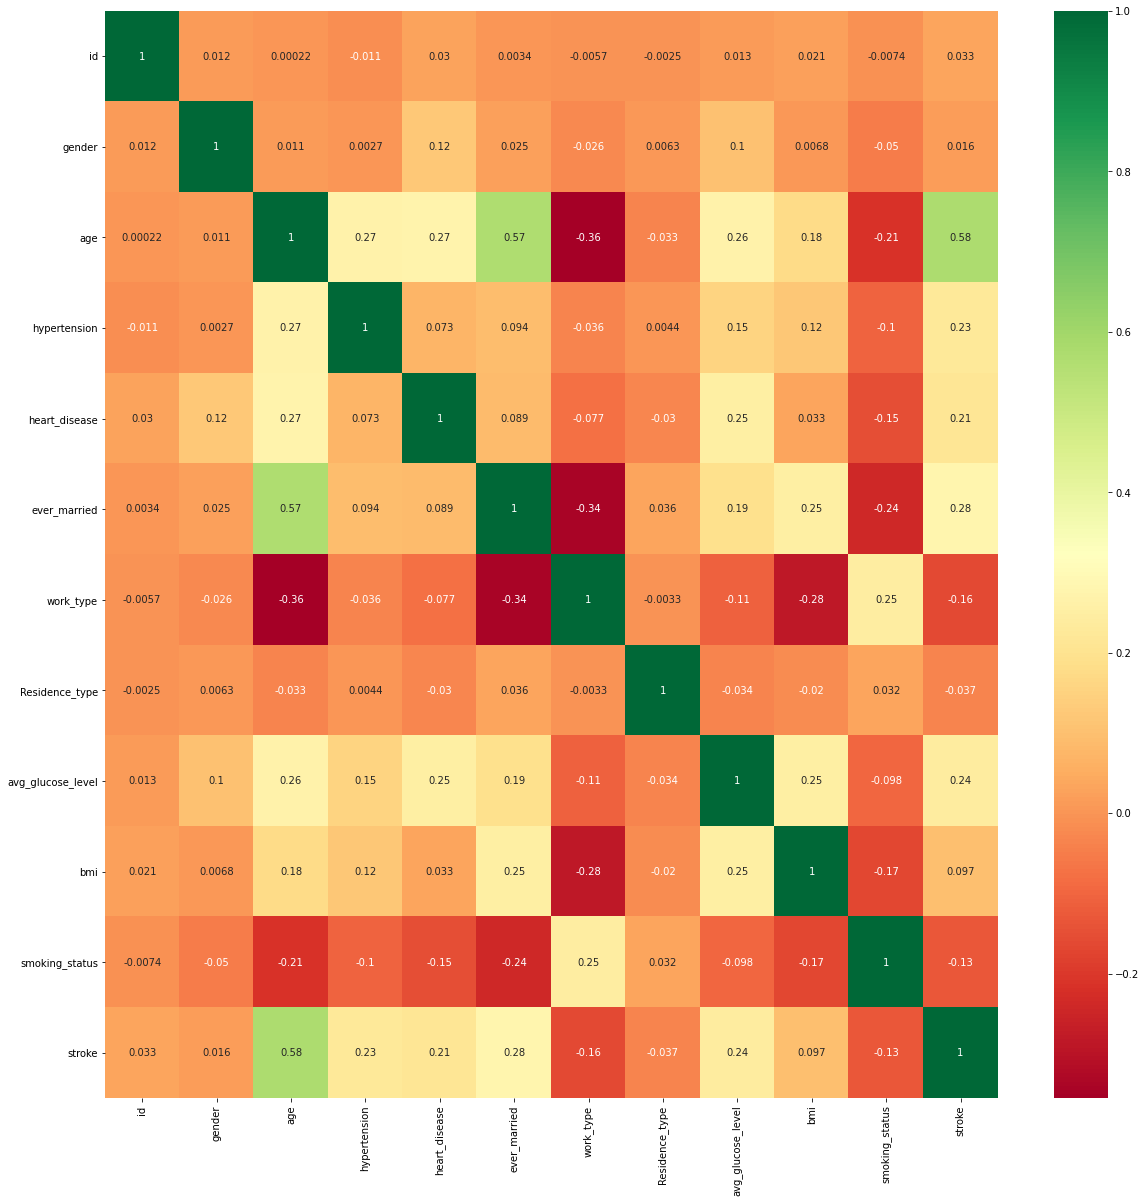

In [25]:
corrmat =dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

We will select following feature for model building:
* age
* avg_glucose_level
* hypertension
* heart_disease
* work_type
* ever_married
* bmi
* smoking_status